In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("archive/GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [7]:
df_berlin = df[df["City"] == "Berlin"].copy()
df_berlin.shape

(3239, 7)

In [8]:
df_berlin["dt"] = pd.to_datetime(df_berlin["dt"], errors="coerce")
df_berlin["dt"].min(), df_berlin["dt"].max()

(Timestamp('1743-11-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

In [9]:
df_berlin = df_berlin[
    (df_berlin["dt"] >= "1953-01-01") &
    (df_berlin["dt"] <= "2013-12-31")
].copy()

In [10]:
df_berlin = df_berlin.dropna(subset=["AverageTemperature"]).copy()
df_berlin.shape

(728, 7)

In [11]:
df_berlin["year"] = df_berlin["dt"].dt.year

yearly = (
    df_berlin.groupby("year")["AverageTemperature"]
    .mean()
    .reset_index()
)

yearly.head()

,year,AverageTemperature
0,1953,10.132583
1,1954,8.414583
2,1955,8.359000
3,1956,7.572583
4,1957,9.461250


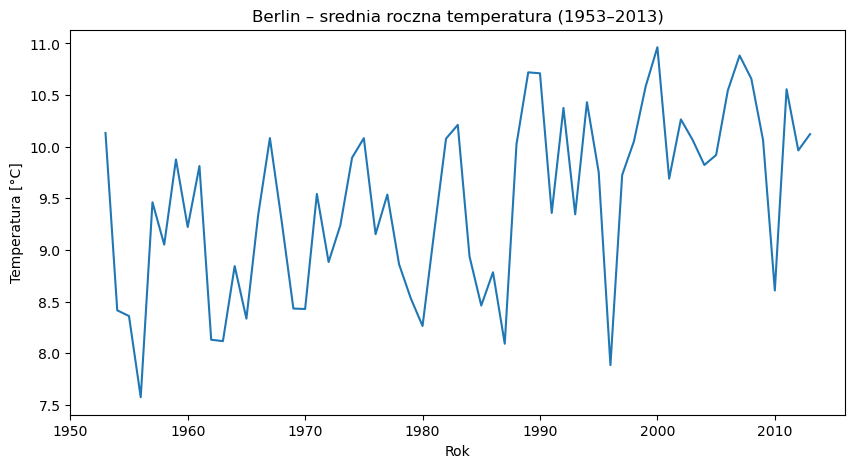

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(yearly["year"], yearly["AverageTemperature"])
plt.title("Berlin – srednia roczna temperatura (1953–2013)")
plt.xlabel("Rok")
plt.ylabel("Temperatura [°C]")
plt.show()

In [16]:
avg_53_73 = yearly[(yearly["year"] >= 1953) & (yearly["year"] <= 1973)]["AverageTemperature"].mean()
avg_94_13 = yearly[(yearly["year"] >= 1994) & (yearly["year"] <= 2013)]["AverageTemperature"].mean()

diff = avg_94_13 - avg_53_73

print(f"Srednia 1953–1973: {avg_53_73:.2f} °C")
print(f"Srednia 1994–2013: {avg_94_13:.2f} °C")
print(f"Roznica (ostatnie 20 lat - pierwsze 20 lat): {diff:.2f} °C")

Srednia 1953–1973: 8.98 °C
Srednia 1994–2013: 10.03 °C
Roznica (ostatnie 20 lat - pierwsze 20 lat): 1.05 °C


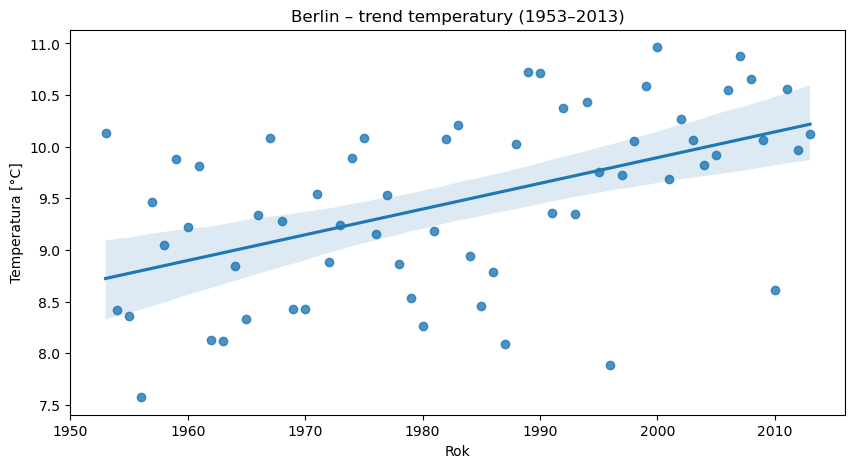

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.regplot(data=yearly, x="year", y="AverageTemperature")
plt.title("Berlin – trend temperatury (1953–2013)")
plt.xlabel("Rok")
plt.ylabel("Temperatura [°C]")
plt.show()